In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from XRD import crystal, Element, XRD
import sys
import os
from similarity import Similarity

In [2]:
def testFWHM(structure):
    wavelength = 1.54056
    max2theta = 125
    path = './data/'
    struct = crystal('POSCAR',filename=path+structure+'-POSCAR')
    N = 10000    
    U = 5.776410E-03 # FWHM parameter, U
    V = -1.673830E-03 # FWHM parameter, V
    W = 5.668770E-03 # FWHM parameter, W
    A = 1.03944 # Asymmetry parameter, a1
    eta_h = 0.504656 # Mixing parameter, eta_H0
    eta_l = 0.611844  # Mixing parameter, eta_L0
    profiling = {'function':'split-type', 'U':U, 'V':V, 'W':W, 'A':A, 'eta_h':eta_h, 'eta_l':eta_l}
    # pxrd 
    xrd1 = XRD(struct, wavelength, max2theta, False, 0.55) 
    xrd1.get_profile(xrd1.theta2,xrd1.xrd_intensity/np.max(xrd1.xrd_intensity),N,**profiling)

    # profiling from vesta  
    merc_pattern = np.loadtxt(structure+'.gpd')
    mx = merc_pattern[:,0]
    my = merc_pattern[:,1]/ np.max(merc_pattern[:,1])
    patterng = np.vstack((mx,my))

    plt.figure(figsize=(15,4))
    plt.plot(xrd1.spectra[0],xrd1.spectra[1],'b--',label = 'pxrd')
    plt.plot(mx,my, 'orange',label = 'vesta')
    plt.legend()
    plt.show()

    S = Similarity(xrd1.spectra, patterng, N, None, 1, 'cosine')
    print('Similarity = ',S.calculate())

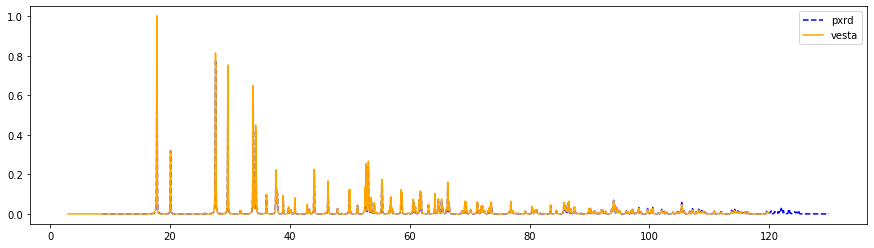

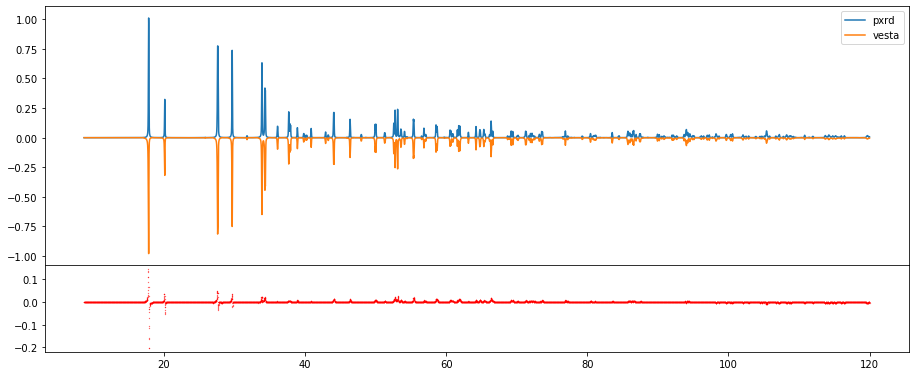

Similarity =  0.9921318862716395


In [3]:
testFWHM('A-1')

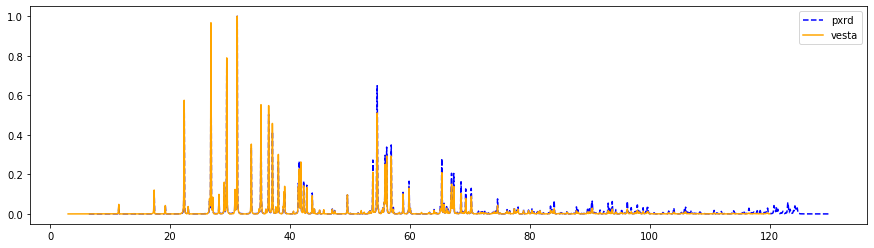

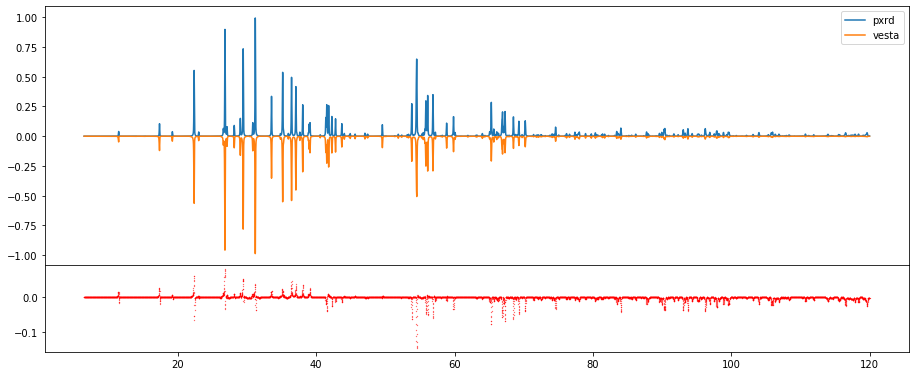

Similarity =  0.9875988749737507


In [4]:
testFWHM('B-1')

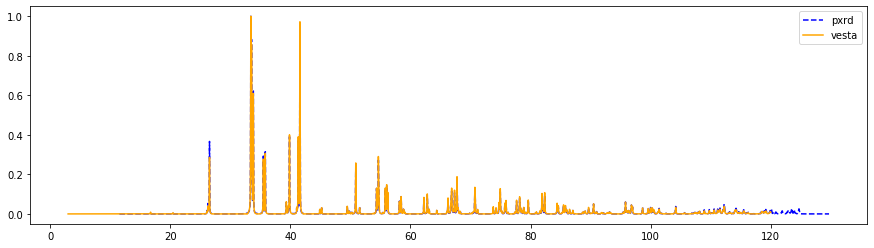

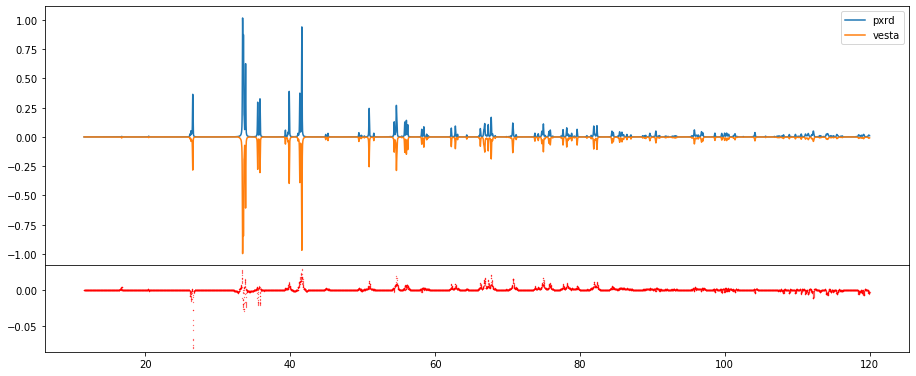

Similarity =  0.9976609909773956


In [5]:
testFWHM('Cm')

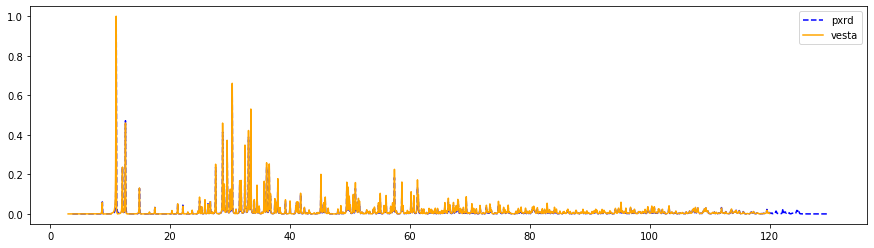

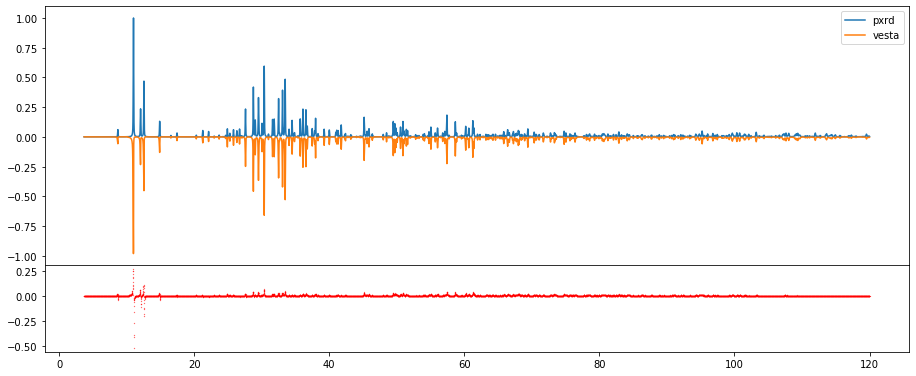

Similarity =  0.9574063091828424


In [6]:
testFWHM('Cccm')

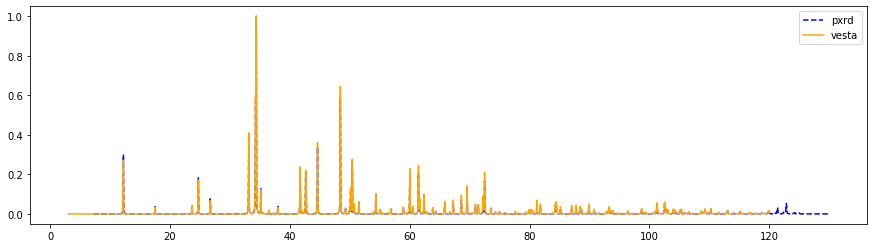

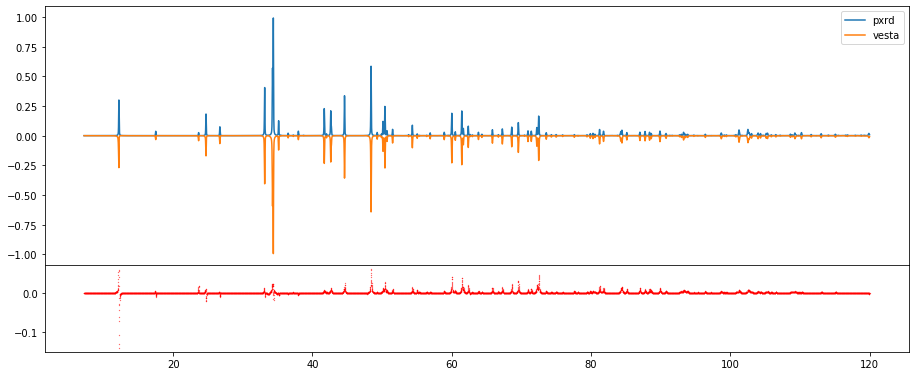

Similarity =  0.993938286151639


In [7]:
testFWHM('I2mb')

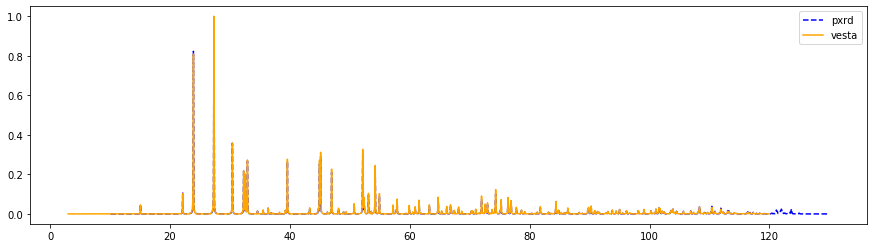

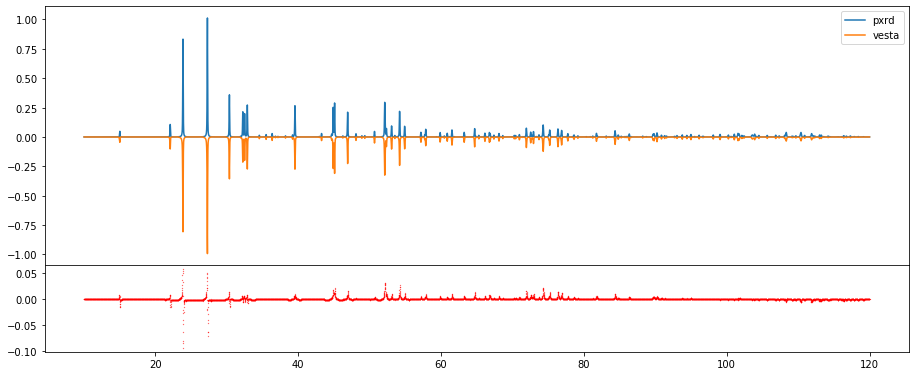

Similarity =  0.9952344318797898


In [8]:
testFWHM('Pcab')

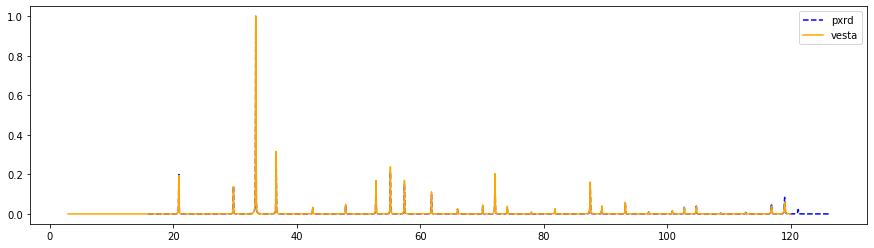

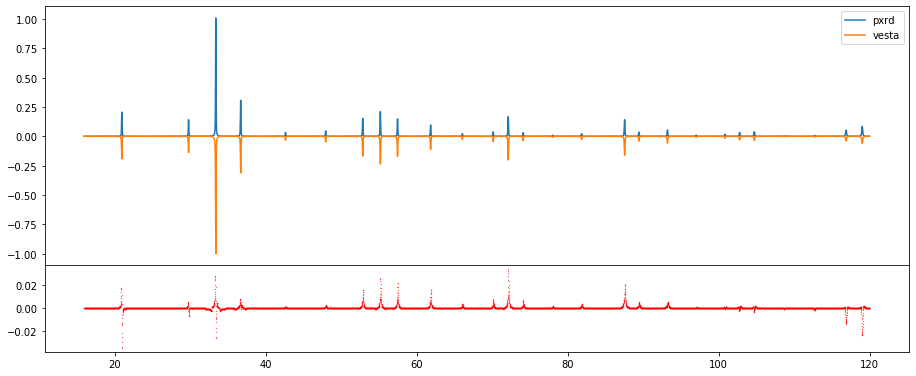

Similarity =  0.9969419530567315


In [9]:
testFWHM('P-43n')

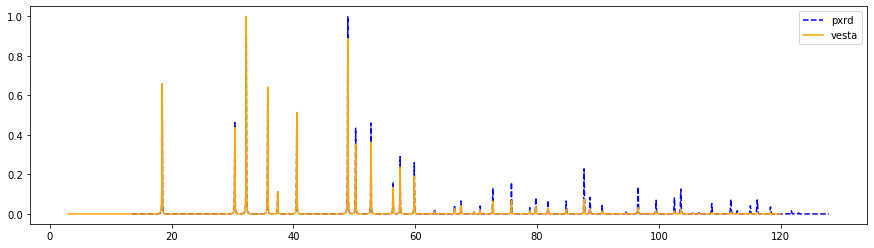

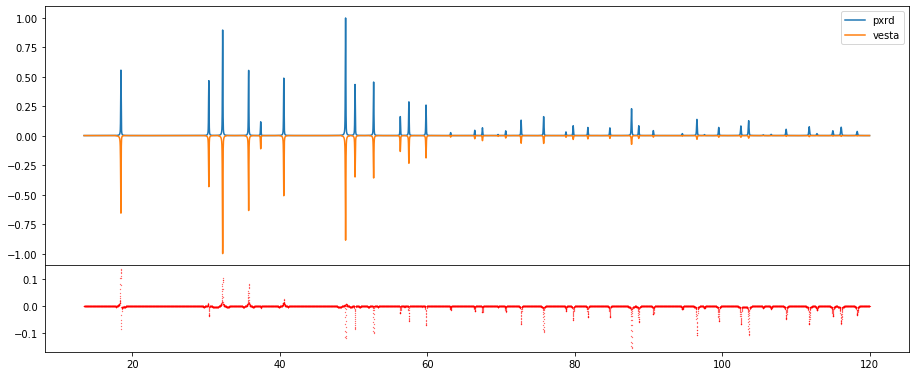

Similarity =  0.9709046593547909


In [10]:
testFWHM('R3m')

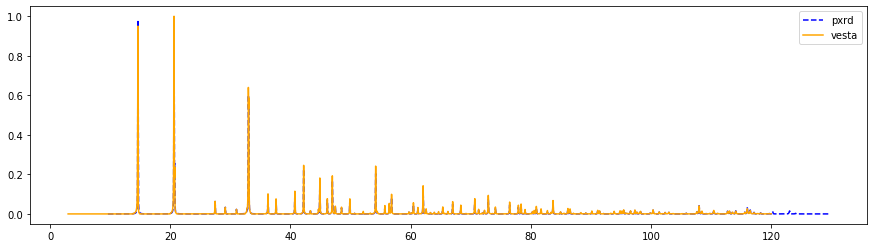

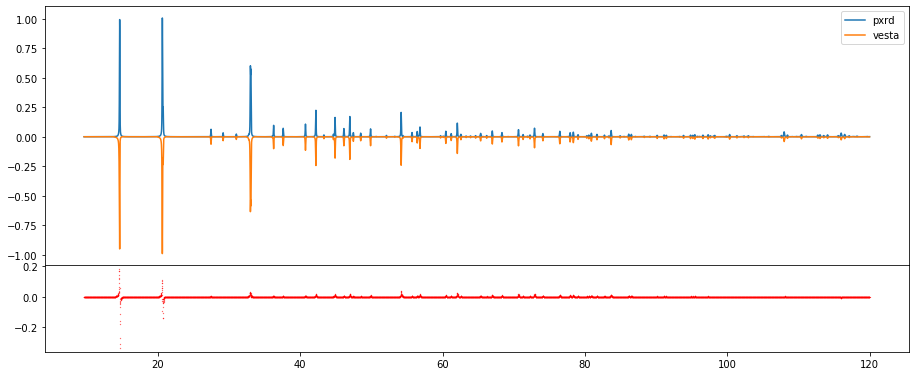

Similarity =  0.977850305068527


In [11]:
testFWHM('P4_2=ncm')

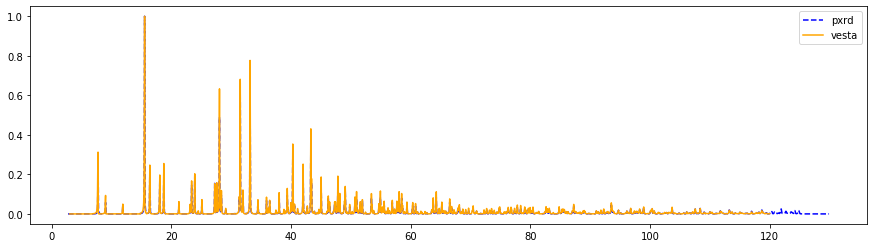

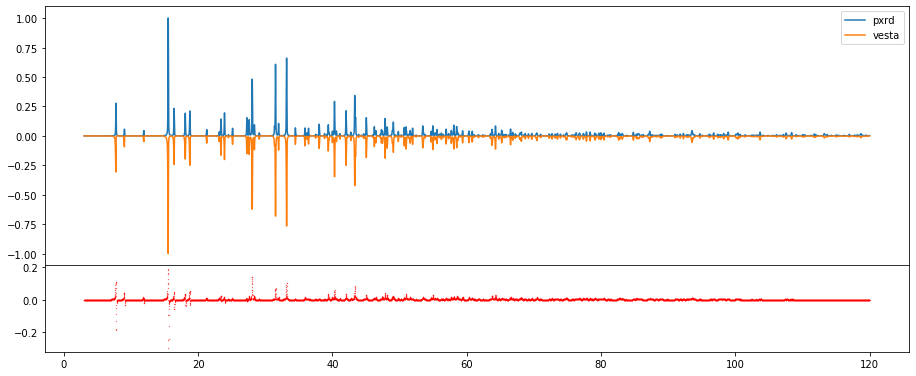

Similarity =  0.9748784009869111


In [12]:
testFWHM('Pmma')